In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib import style
import datetime as dt

In [2]:
#load the data
path = "C:\\Users\\ow7ks\\Desktop"
os.getcwd()
os.chdir(path)
data = pd.read_excel('list1.xlsx',parse_dates= True, index_col = 1)
data = pd.DataFrame(data)

In [3]:
#delete the unnecessary columns,leave only apple
del data['PERMNO']
del data['Names Ending Date']
del data['Share Code'], data['Exchange Code']
del data['Standard Industrial Classification Code'], data['CUSIP'], data['Share Class'], data['Trading Symbol']
del data['North American Industry Classification System'], data['Primary Exchange'],data['Trading Status'],data['Security Status'],
del data['PERMCO'],data['Nasdaq Issue Number'],data['Exchange Code Header'],data['Standard Industrial Classification Code.1'],data['CUSIP Header'],
del data['Declaration Date'],data['Amount After Delisting'], data['Date of Delisting Payment'],data['Delisting Code'],data['Date of Next Available Information'],
del data['Payment Date'],data['Record Date'],data['Number of Shares Outstanding'],data['Header SIC Major Gorup'],data['Header SIC Industry Group'],
del data['Distribution Code'],data['Acquiring PERMCO'],data['Acquiring PERMNO']
del data['New PERMNO'], data['Nasdaq Traits Code'], data['Nasdaq National Market Indicator'],data['Nasd Index Code']

data.columns
apple = data.loc[data['Ticker Symbol'] == 'AAPL']

In [4]:
apple.columns

Index(['Ticker Symbol', 'Company Name', 'Dividend Cash Amount',
       'Factor to Adjust Price', 'Factor to Adjust Shares',
       'Delisting Return Without Dividends', 'Delisting Price',
       'Delisting Return', 'Market Maker Count', 'Bid or Low Price',
       'Ask or High Price', 'Price or Bid/Ask Average', 'Volume', 'Returns',
       'Bid', 'Ask', 'Shares Outstanding',
       'Cumulative Factor to Adjust Prices',
       'Cumulative Factor to Adjust Shares/Vol', 'Price Alternate',
       'NASDAQ Number of Trades', 'Returns without Dividends',
       'Value-Weighted Return-incl. dividends',
       'Value-Weighted Return-excl. dividends',
       'Equal-Weighted Return-incl. dividends',
       'Equal-Weighted Return-excl. dividends', 'Return on the S&P 500 Index'],
      dtype='object')

In [5]:
#check the dividends
dividends = [0]
for i in range(len(apple.index)):
    if apple['Dividend Cash Amount'].notnull()[i]:
        #print(apple['Dividend Cash Amount'][i],apple.index[i])
        if apple['Dividend Cash Amount'][i] != dividends[-1]:
            dividends.append(apple['Dividend Cash Amount'][i])
dividends

[0, 2.65, 3.05, 3.29, 0.0, 0.47, 0.52, 0.57, 0.63, 0.73]

In [6]:
#give every day a dividend feature based on its previous pay day
for i in range(len(apple.index)):
    if apple.index[i] < dt.datetime(2012,8,9):
        apple['Dividend Cash Amount'][i] = dividends[0]
    elif apple.index[i] < dt.datetime(2013,5,9):
        apple['Dividend Cash Amount'][i] = dividends[1]
    elif apple.index[i] < dt.datetime(2014,5,8):
        apple['Dividend Cash Amount'][i] = dividends[2]
    elif apple.index[i] < dt.datetime(2014,6,9):
        apple['Dividend Cash Amount'][i] = dividends[3]
    elif apple.index[i] < dt.datetime(2014,8,7):
        apple['Dividend Cash Amount'][i] = dividends[4]
    elif apple.index[i] < dt.datetime(2015,5,7):
        apple['Dividend Cash Amount'][i] = dividends[5]
    elif apple.index[i] < dt.datetime(2016,5,5):
        apple['Dividend Cash Amount'][i] = dividends[6]
    elif apple.index[i] < dt.datetime(2017,5,11):
        apple['Dividend Cash Amount'][i] = dividends[7]
    elif apple.index[i] < dt.datetime(2018,5,11):
        apple['Dividend Cash Amount'][i] = dividends[8]
    else:
        apple['Dividend Cash Amount'][i] = dividends[9]

C:\Users\ow7ks\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ow7ks\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ow7ks\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\

In [7]:
#check for stock splits
for i in range(len(apple['Factor to Adjust Shares'])):
    if apple['Factor to Adjust Shares'].notnull()[i] == True and apple['Factor to Adjust Shares'][i] > 0:
        print(apple.index[i], apple['Factor to Adjust Shares'][i],apple['Price or Bid/Ask Average'][i-1],apple['Price or Bid/Ask Average'][i])

2005-02-28 00:00:00 1.0 88.99 44.86
2014-06-09 00:00:00 6.0 645.57001 93.7


In [8]:
#adjust the stock price to its afterwards

for i in range(len(apple.index)):
    if apple.index[i] < dt.datetime(2005,2,28):
        apple['Price or Bid/Ask Average'][i] = apple['Price or Bid/Ask Average'][i] // 12
        apple['Ask or High Price'][i] = apple['Ask or High Price'][i]//12
        apple['Bid or Low Price'][i] = apple['Bid or Low Price'][i]//12
    elif apple.index[i] < dt.datetime(2014,6,9):
        apple['Price or Bid/Ask Average'][i] = apple['Price or Bid/Ask Average'][i] // 6
        apple['Ask or High Price'][i] = apple['Ask or High Price'][i]//6
        apple['Bid or Low Price'][i] = apple['Bid or Low Price'][i]//6
        

C:\Users\ow7ks\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ow7ks\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ow7ks\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ow7ks\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyW

In [9]:
#define the visualizing function
def candle_stick(ticker):
    df_ohlc = ticker['Ask or High Price'].resample('10D').ohlc()
    df_volume = ticker['Volume'].resample('10D').sum()
    df_ohlc.reset_index(inplace = True)
    df_ohlc['Names Date'] = df_ohlc['Names Date'].map(mdates.date2num)
    ax1 = plt.subplot2grid((6,1),(0,0), rowspan= 5, colspan=1)
    ax2 = plt.subplot2grid((6,1),(5,0), rowspan= 1, colspan=1, sharex = ax1)
    ax1.xaxis_date()

    candlestick_ohlc(ax1, df_ohlc.values, width = 2, colordown='g', colorup='r')
    ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values, 0)
    plt.show()

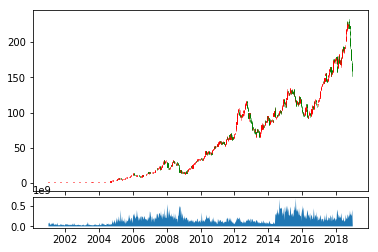

In [10]:
candle_stick(apple)